<a href="https://colab.research.google.com/github/LudovicaCi/SentimentAnalysis/blob/main/TrainingsetBuilding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


reviews = pd.read_csv('/content/drive/MyDrive/DataMining/Dataset/reviews_podcast_2020.csv')

In [2]:
print(reviews.columns)

Index(['content', 'rating'], dtype='object')


In [3]:
df = reviews

In [4]:
# Mappa i rating alle classi
mappatura_classi = {
    4: 'positive',
    5: 'positive',
    3: 'neutral',
    2: 'negative',
    1: 'negative'
}

# Sostituisci i valori nella colonna 'rating' con le corrispondenti classi
df['rating'] = df['rating'].replace(mappatura_classi)

# Visualizza il DataFrame con i rating sostituiti dalle classi
print(df.head())

                         content    rating
0                     Take me on  positive
1         Show off the quads Pft  positive
2              Best fill in EVER  positive
3           I needed this today.  positive
4  I need so much more of this 😴  positive


In [5]:
# Crea tre DataFrame distinti per ciascuna classe di rating
df_positive = df[df['rating'] == 'positive'].copy()
df_neutral = df[df['rating'] == 'neutral'].copy()
df_negative = df[df['rating'] == 'negative'].copy()

# Visualizza i primi cinque elementi di ciascun DataFrame
print("DataFrame Positive:")
print(df_positive.head())
print(df_positive.shape[0])

print("\nDataFrame Neutral:")
print(df_neutral.head())
print(df_neutral.shape[0])

print("\nDataFrame Negative:")
print(df_negative.head())
print(df_negative.shape[0])

DataFrame Positive:
                         content    rating
0                     Take me on  positive
1         Show off the quads Pft  positive
2              Best fill in EVER  positive
3           I needed this today.  positive
4  I need so much more of this 😴  positive
1007776

DataFrame Neutral:
                                               content   rating
87   I am only on episode 24. Until now, I binged a...  neutral
117  If it wasn’t for Brit. I would give you a 5sta...  neutral
132  Great story telling by Dr Phill but the music ...  neutral
155  Kara is a self centered narcissistic who think...  neutral
166  Do several podcasts in a couple days to stock ...  neutral
26412

DataFrame Negative:
                                              content    rating
11                As you can tell, I did not like it.  negative
15  Look elsewhere for thoughtful and unbiased NFL...  negative
18   Without Chris Carter the show isn’t good anymore  negative
27  I’ve tried a few differ

In [6]:
# Determina il numero minimo di recensioni per classe
numero_di_recensioni_per_classe = min(len(df_positive), len(df_neutral), len(df_negative))

# Campiona lo stesso numero di recensioni da ciascun DataFrame
df_bilanciato = pd.concat([
    df_positive.sample(numero_di_recensioni_per_classe, random_state=42),
    df_neutral.sample(numero_di_recensioni_per_classe, random_state=42),
    df_negative.sample(numero_di_recensioni_per_classe, random_state=42)
])

# Visualizza il DataFrame bilanciato
print(df_bilanciato.head())

                                                   content    rating
1098009  It was great to hear the background & history ...  positive
262259               Thanks for making me laugh every day!  positive
1097272  My wife and I are KC Symphony Masterworks subs...  positive
919722   I really enjoy the dynamic between Jared and G...  positive
1014179  so glad I came across this podcast. These 2 br...  positive


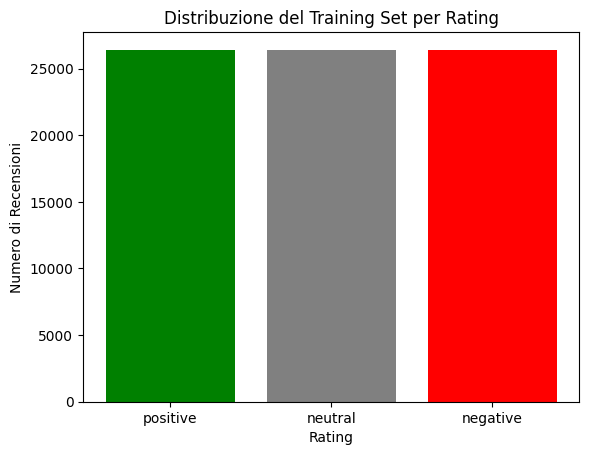

In [10]:
import matplotlib.pyplot as plt

ratings_distribution = df_bilanciato['rating'].value_counts()

# Visualizza la distribuzione del training set
plt.bar(ratings_distribution.index, ratings_distribution.values, color=['green', 'gray', 'red'])
plt.title('Distribuzione del Training Set per Rating')
plt.xlabel('Rating')
plt.ylabel('Numero di Recensioni')
plt.show()

In [11]:
df_bilanciato.to_csv('/content/drive/MyDrive/DataMining/Dataset/trainingSet.csv', index=False)